<a href="https://colab.research.google.com/github/DeveloperAkram/Colab-Notebooks/blob/master/ML7013_Simple_Linear_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# Importing Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Load Dataset

from google.colab import drive
drive._mount('/content/akramchowdhury')

Drive already mounted at /content/akramchowdhury; to attempt to forcibly remount, call drive.mount("/content/akramchowdhury", force_remount=True).


In [78]:
df = pd.read_csv('/content/akramchowdhury/MyDrive/Colab Notebooks/ML7001 - Machine Learning Algorithms/Salary_Data.csv')

In [79]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [80]:
df.shape

(30, 2)

In [81]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [82]:
df.sample(10)

,YearsExperience,Salary
8,3.2,64445.0
1,1.3,46205.0
16,5.1,66029.0
10,3.9,63218.0
18,5.9,81363.0
26,9.5,116969.0
27,9.6,112635.0
22,7.9,101302.0
20,6.8,91738.0
21,7.1,98273.0


In [83]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [84]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [86]:
df.shape

(30, 2)

In [87]:
df = df.drop_duplicates()

In [88]:
df.shape

(30, 2)

In [89]:
# check the NULL values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [90]:
# Create Dependently(y) and Independent(X) variables
target_feature = 'Salary'

# Separate object for target feature
y = df[target_feature]

# Separate Object for input Feature
X = df.drop(target_feature, axis = 1)

In [91]:
X.shape, y.shape

((30, 1), (30,))

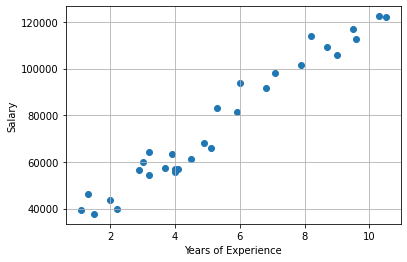

In [92]:
# Data Visualization before train the Model

plt.scatter(X, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [93]:
# Split Dataset to Train and Test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [94]:
x_train.shape, x_test.shape

((24, 1), (6, 1))

In [95]:
# Apply Linear Regression on Train Dataset

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [96]:
lr.fit(x_train, y_train)

LinearRegression()

In [97]:
# Get the Parameters

lr.intercept_
print('intercept(b) is: ', lr.intercept_)

intercept(b) is:  26780.09915062818


In [98]:
lr.coef_
print('coefficient (m) is: ', lr.coef_)

coefficient (m) is:  [9312.57512673]


In [99]:
# Apply the Model on Test Dataset to get the predict the values

y_pred = lr.predict(x_test)

In [100]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [101]:
y_pred.shape

(6,)

In [102]:
# To compare the actual output values with predicted values

df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'varience': y_test-y_pred})

In [103]:
df1

,Actual,Predicted,varience
2,37731.0,40748.961841,-3017.961841
28,122391.0,122699.622956,-308.622956
13,57081.0,64961.657170,-7880.657170
10,63218.0,63099.142145,118.857855
26,116969.0,115249.562855,1719.437145
24,109431.0,107799.502753,1631.497247


In [104]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [105]:
# Prediction the result of 1.5 years

pred = np.array([1.5]).reshape(-1,1)
lr.predict(pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([40748.96184072])

In [106]:
# y = m*x + b

9345.94244*1.5 + 26016.192244

40035.105904000004

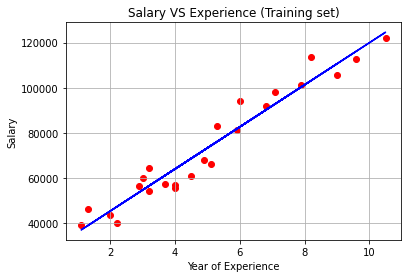

In [107]:
# Visualize our training model

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Salary VS Experience (Training set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

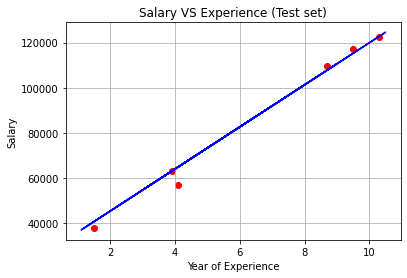

In [108]:
# Visualize our test set result

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color='blue')
plt.title('Salary VS Experience (Test set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.grid()
plt.show()

In [109]:
# Evaluation metrics of regression algorithms

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)*100
print("Score: ", score)

Score:  98.8169515729126


In [111]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  2446.1723690465055
Mean Squared Error:  12823412.298126549
Root Mean Squared Error:  3580.979237321343
